In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import os

In [145]:
basePath = '../measurements/'
df = pd.read_csv(basePath+'1_Octree_maxDepth_10_maxInLeaf_4_w_duplicates_response_on.csv'
                 , header=None,
                names=['dt','size','count', 'maxDepth','maxLeaft','totalLeafElements'])
nrange = range(len(df))


In [160]:
# df.groupby('count').mean().index

Int64Index([  1000,   1002,   1004,   1005,   1007,   1009,   1010,   1012,
              1014,   1016,
            ...
             50193,  53295,  56717,  61209,  66021,  71607,  79384,  88006,
             98778, 115136],
           dtype='int64', name='count', length=1008)

In [161]:
def plot(dataframe, xstr, ystr, xlabel, ylabel, figname, 
         xlimUpper=None,  ylimUpper=None, title=None, dataframe2=None, label1=None, label2=None):
# plt.figure(figsize=(10,10))
    dfg = dataframe.groupby(xstr).mean()
    xdf, ydf = dfg.index, dfg[ystr]
    lbl = 'uzorak' if label1 is None else label1
    plt.plot(xdf, ydf, label=lbl) #1/df['dt']*60)
    if dataframe2 is not None:
        lbl = 'uzorak' if label2 is None else label2
        plt.plot(dataframe2[xstr], dataframe2[ystr], label=lbl) 
    if title != None:
        plt.title(title)
    # plt.plot([-10, max(df['count'])], [1,1])
    plt.plot([min(xdf), max(xdf)], [min(ydf), min(ydf) * max(xdf)/min(xdf) ], 'g--', label='linearno', alpha=0.5)
    plt.xlim(min(xdf), xlimUpper if xlimUpper is not None else max(xdf))
    if ylimUpper != None:
        plt.ylim(0, ylimUpper) #5
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.axhline(y=1, color='orange', alpha=0.3, label='60fps')
    plt.axhline(y=2, color='red', alpha=0.3, label='30fps')
    plt.savefig(figname + '.pdf')
    plt.legend()
    plt.show()


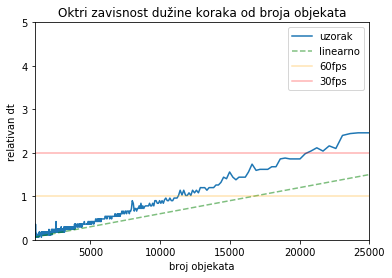

In [162]:

plot(dataframe=df, xstr='count', ystr='dt', 
     xlabel='broj objekata', ylabel='relativan dt', xlimUpper=25000, ylimUpper=5, 
     title='Oktri zavisnost dužine koraka od broja objekata', figname='oktri_dt_vs_numobj')

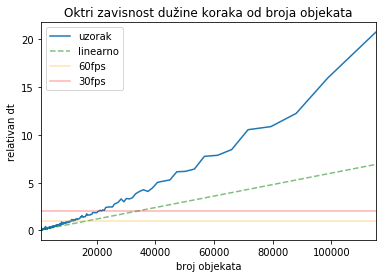

In [163]:
plot(dataframe=df, xstr='count', ystr='dt', 
     xlabel='broj objekata', ylabel='relativan dt',# xlimUpper=25000, ylimUpper=5, 
     title='Oktri zavisnost dužine koraka od broja objekata', figname='oktri_dt_vs_numobj_zoomout')

In [170]:
def moveFiguresToTexDir():
    for file in os.listdir('.'):
        if file.endswith(".pdf"):
            print('moving', file)
            dest = '../tex/figures/' + file
            if os.path.exists(dest):
                  os.remove(dest)
            os.rename(file, dest)
moveFiguresToTexDir()

moving oktri_dt_vs_numobj.pdf
moving oktri_dt_vs_numobj_zoomout.pdf


In [165]:
df1 = pd.read_csv(basePath+'Idle_drawing.csv'
                 , header=None,
                names=['dt','size','count'])
df2 = pd.read_csv(basePath+'Idle_notDrawing.csv'
                 , header=None,
                names=['dt','size','count'])

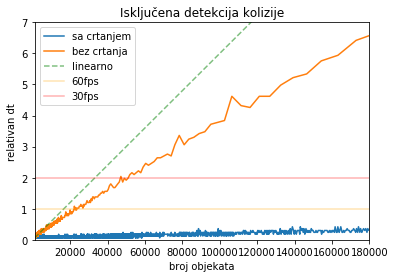

In [166]:
plot(dataframe=df2, xstr='count', ystr='dt', 
     xlabel='broj objekata', ylabel='relativan dt', xlimUpper=180000, ylimUpper=7, 
     title='Isključena detekcija kolizije', figname='idleDrawVsNoDraw',
    dataframe2=df1, label1='sa crtanjem', label2='bez crtanja')

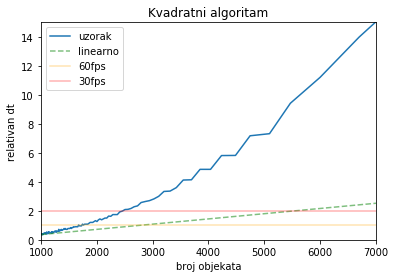

In [167]:
df = pd.read_csv(basePath+'BasicCollision.csv'
                 , header=None,
                names=['dt','size','count'])

plot(dataframe=df, xstr='count', ystr='dt', 
     xlabel='broj objekata', ylabel='relativan dt', xlimUpper=7000, ylimUpper=15, 
     title='Kvadratni algoritam', figname='basicCollision',
   )